<a href="https://colab.research.google.com/github/SayaliDeodikar/PCOS_Detection_System/blob/main/ML_PCOS_Try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv("/content/drive/MyDrive/PCOS_data.csv")

In [51]:
data.head()

,Timestamp,1. Pick your age limit,2. Which work profile matches you?,3. What is your marital status?,4. How many kids do you have?,5. How would you describe your Body Physic?,6. Have you done any ultrasound scanning and what does your report say?,7. Do you notice any of these right before your period begins?,8. Are you experiencing irregular or late periods?,9. Are you experiencing painful periods?,...,16. Do you suffer from diabetes?,17. Do you suffer from hypothyroidism?,18. Do you experience excessive growth of facial and body hair?,19. Do you have acne/hyper-pigmentation?,20. Do you have the habit of consuming alcohol?,21. Do you have habit of smoking?,21. Are you under any stress?,22. Do you exercise regularly?,23. How would you describe your diet?,24. Are you diagnosed with PCOS/PCOD?
0,8/12/2022 14:50:10,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Constipation,No,Yes,...,No,No,No,No,No,No,No,Yes,Consist of packaged/processed food,I Don't know
1,8/12/2022 14:50:41,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Mood Swings,No,No,...,No,No,No,Yes,No,No,No,No,Consist of packaged/processed food,I Don't know
2,8/12/2022 14:56:46,19-34,Employed,Unmarried,0,I am a bit overweight,Normal results,Mood Swings,No,Yes,...,No,No,No,Yes,No,No,No,Yes,Consist of high fiber and balance between carb...,No
3,8/12/2022 14:57:19,19-34,Student,Unmarried,0,I am a bit overweight,No scanning was done,Constipation,Yes,Yes,...,No,No,No,Yes,No,No,Yes,No,Consist of packaged/processed food,I Don't know
4,8/12/2022 15:02:16,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Mood Swings,No,No,...,No,No,No,No,No,No,No,No,Consist of packaged/processed food,I Don't know


In [52]:
data.shape

(166, 26)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 26 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Timestamp                                                                166 non-null    object
 1   1. Pick your age limit                                                   166 non-null    object
 2   2. Which work profile matches you?                                       166 non-null    object
 3   3. What is your marital status?                                          166 non-null    object
 4   4. How many kids do you have?                                            166 non-null    object
 5   5. How would you describe your Body Physic?                              166 non-null    object
 6   6. Have you done any ultrasound scanning and what does your report say?  166 non-n

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data = pd.DataFrame(data)

In [56]:
data.rename(columns = {'1. Pick your age limit': 'age limit', 
                       '2. Which work profile matches you?': 'Profession', 
                       '3. What is your marital status?':'marital status', 
                       '4. How many kids do you have?':'no of kids', 
                       '5. How would you describe your Body Physic?':'body type', 
                       '6. Have you done any ultrasound scanning and what does your report say?':'ultrasound status', 
                       '7. Do you notice any of these right before your period begins?':'PMS', 
                       '8. Are you experiencing irregular or late periods?':'regular periods', 
                       '9. Are you experiencing painful periods?':'painful periods', 
                       '10. Are you experiencing excessive bleeding?':'excessive bleeding',
                       '11. How often do you get your periods?':'period cycle',
                       '12. How long does your period last?':'period length',
                       '13. How would you like to rate your period pains?':'period pain scale',
                       '14. Do you notice any clots during your periods?':'period clots',
                       '15. Is/was your mother diagnosed with PCOS/PCOD? ':'genetic PCOS',
                       '16. Do you suffer from diabetes?':'diabetes',
                       '17. Do you suffer from hypothyroidism?':'hypothyroid',
                       '18. Do you experience excessive growth of facial and body hair?':'excessive hair growth',
                       '19. Do you have acne/hyper-pigmentation?':'acne',
                       '20. Do you have the habit of consuming alcohol?':'alcohol habit',
                       '21. Do you have habit of smoking?': 'smoking habit',
                       '21. Are you under any stress?':'stress',
                       '22. Do you exercise regularly?':'regular excercise',
                       '23. How would you describe your diet?':'diet',
                       '24. Are you diagnosed with PCOS/PCOD?':'diagnosis',
                       }, inplace = True)

In [57]:
data.drop('Timestamp', axis = 1, inplace = True)

In [58]:
data.isna().sum()

age limit                0
Profession               0
marital status           0
no of kids               0
body type                0
ultrasound status        0
PMS                      0
regular periods          0
painful periods          0
excessive bleeding       0
period cycle             0
period length            0
period pain scale        0
period clots             0
genetic PCOS             0
diabetes                 0
hypothyroid              0
excessive hair growth    0
acne                     0
alcohol habit            0
smoking habit            0
stress                   0
regular excercise        0
diet                     0
diagnosis                0
dtype: int64

In [59]:
print("Unique values: ")
for i in data.columns:
  print(f"{i}:{data[i].unique()}")

Unique values: 
age limit:['19-34' '35 - 50' '50 and above' 'Less than 18']
Profession:['Student' 'Employed' 'Unemployed']
marital status:['Unmarried' 'Married']
no of kids:['0' '2' '1' 'More than 2']
body type:['I am at a healthy weight' 'I am a bit overweight' 'I am Underweight'
 'I am obese']
ultrasound status:['No scanning was done' 'Normal results' 'Cysts in Ovary'
 "I don't remember"]
PMS:['Constipation' 'Mood Swings' 'None' 'Headache' 'Breast Pain' 'Bloating'
 'Diarrhoea' 'Sleeplessness']
regular periods:['No' 'Yes']
painful periods:['Yes' 'No']
excessive bleeding:['No' 'Yes']
period cycle:['21 - 40 days' 'Less than 21 days' 'More than 40 days']
period length:['3 - 5 days' '5 - 7 days' 'Less than 3 days' 'More than 7 days']
period pain scale:['Severe' 'Mild' 'Moderate' 'No period pain']
period clots:['Yes small clots' 'No clots' 'Yes large clots']
genetic PCOS:['No' 'Yes']
diabetes:['No' 'Yes']
hypothyroid:['No' 'Yes']
excessive hair growth:['No' 'Yes']
acne:['No' 'Yes']
alcohol

In [41]:
# plt.figure(figsize = (20, 20))
# for i in enumerate(data.columns, 1):
#   plt.subplot(5, 5, i[0])
#   count_chart = sns.countplot(data[i[1]])
#   count_chart.set_xticklabels(count_chart.get_xticklabels(), rotation=30)
# plt.show()

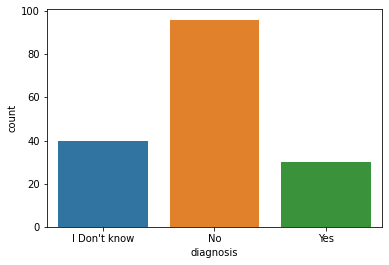

In [61]:
sns.countplot(data['diagnosis'])

In [43]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [62]:
df1=df2=data

In [71]:
df1 = data[data['diagnosis'] == "I Don't know"]
# print(f"Size of data frame for prediction = {df1.shape}")
df1.drop('diagnosis', axis = 1, inplace = True)

In [74]:
df2.drop(df2[df2['diagnosis'] == "I Don't know"].index, inplace = True)

In [75]:
print(f"Data shape for modeling: {df2.shape}")

Data shape for modeling: (126, 25)


In [76]:
#applying label encoding on df1
categ = df1.columns
df1[categ] = df1[categ].apply(LE.fit_transform)

In [77]:
#applying label encoding on df2
categ = df2.columns
df2[categ] = df2[categ].apply(LE.fit_transform)

In [79]:
print(f"Data for prediction = df1 with {df1.shape}")
print(f"Data for modeling = df2 with {df2.shape}")

Data for prediction = df1 with (40, 24)
Data for modeling = df2 with (126, 25)


In [85]:
df2.drop('smoking habit', axis = 1, inplace = True)
df1.drop('smoking habit', axis = 1, inplace = True)

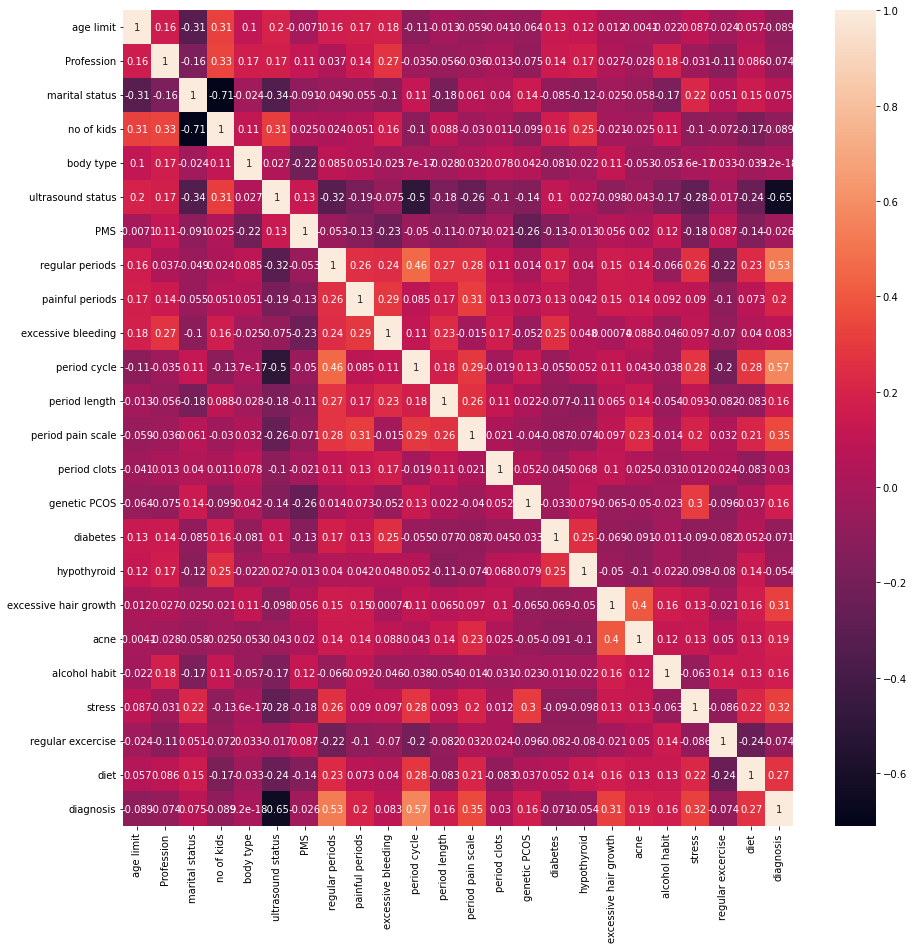

In [99]:
plt.figure(figsize = (15, 15))
sns.heatmap(df2.corr(), annot = True)
plt.show()

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [123]:
df3 = df2

In [131]:

# Create features and target
Y = df3['diagnosis']
X = df3.drop('diagnosis', axis = 1)
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 15)
X_kbest_features = chi2_features.fit_transform(X, Y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 23
Reduced feature number: 15


In [132]:
Y = np.array(Y)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_kbest_features, Y, test_size = 0.2, random_state = 0) 

In [134]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(100, 15) (26, 15) (100,) (26,)


In [135]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR. fit(X_train, Y_train)

LogisticRegression()

In [136]:
from sklearn import metrics

In [137]:
training_prediction_logistic = LR.predict(X_train)
testing_prediction_logistic = LR.predict(X_test)
LR_train_acc = metrics.accuracy_score(Y_train,training_prediction_logistic)
LR_test_acc = metrics.accuracy_score(Y_test,testing_prediction_logistic)
print("Accuracy for training using Logistic Regression: ",LR_train_acc) 
print("Accuracy for testing using Logistic Regression: ",LR_test_acc) 

Accuracy for training using Logistic Regression:  0.98
Accuracy for testing using Logistic Regression:  0.8076923076923077


In [139]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [148]:
training_prediction_RF = RF.predict(X_train)
testing_prediction_RF = RF.predict(X_test)
RF_train_acc = metrics.accuracy_score(Y_train,training_prediction_RF)
RF_test_acc = metrics.accuracy_score(Y_test,testing_prediction_RF)
print("Accuracy for training using Random Forest: ",RF_train_acc) 
print("Accuracy for testing using Random Forest: ",RF_test_acc) 

Accuracy for training using Random Forest:  0.99
Accuracy for testing using Random Forest:  0.7307692307692307


In [155]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [156]:
training_prediction_KNN = KNN.predict(X_train)
testing_prediction_KNN = KNN.predict(X_test)
KNN_train_acc = metrics.accuracy_score(Y_train,training_prediction_KNN)
KNN_test_acc = metrics.accuracy_score(Y_test,testing_prediction_KNN)
print("Accuracy for training using Decision Tree: ",KNN_train_acc) 
print("Accuracy for testing using Decision Tree: ",KNN_test_acc) 

Accuracy for training using Decision Tree:  0.93
Accuracy for testing using Decision Tree:  0.8076923076923077


In [146]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

In [150]:
training_prediction_GNB = GNB.predict(X_train)
testing_prediction_GNB = GNB.predict(X_test)
GNB_train_acc = metrics.accuracy_score(Y_train,training_prediction_GNB)
GNB_test_acc = metrics.accuracy_score(Y_test,testing_prediction_GNB)
print("Accuracy for training using Naive Bayes: ",GNB_train_acc) 
print("Accuracy for testing using Naive Bayes: ",GNB_test_acc) 

Accuracy for training using Naive Bayes:  0.9
Accuracy for testing using Naive Bayes:  0.9230769230769231
